In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# in millions of units sold
df = pd.read_csv('total_vehicle_sales.csv')

In [5]:
df.head()

,DATE,TOTALSA
0,1976-01-01,12.814
1,1976-02-01,13.340
2,1976-03-01,13.378
3,1976-04-01,13.223
4,1976-05-01,12.962


In [7]:
from tabula import read_pdf

In [35]:
df2 = read_pdf("copper_summary_2022.pdf", pages='2')[0]
# convert PDF into CSV
df2.to_csv('copper_summary_2022.csv', encoding='utf-8')
print(df2)

   company and (or) Government information.           Unnamed: 0 Unnamed: 1
0                           Mine production  Refinery production  Reserves6
1                                2020 2021e           2020 2021e        NaN
2                 United States 1,200 1,200            918 1,000     48,000
3                         Australia 885 900              427 450    793,000
4                            Canada 585 590             e290 300      9,800
5                         Chile 5,730 5,600          2,330 2,200    200,000
6                         China 1,720 1,800        10,000 10,000     26,000
7              Congo (Kinshasa) 1,600 1,800          1,350 1,500     31,000
8                               Germany — —              643 630          —
9                         Indonesia 505 810              269 270     24,000
10                                Japan — —          1,580 1,500          —
11                       Kazakhstan 552 520              515 470     20,000
12          

In [36]:
df2

,company and (or) Government information.,Unnamed: 0,Unnamed: 1
0,Mine production,Refinery production,Reserves6
1,2020 2021e,2020 2021e,NaN
2,"United States 1,200 1,200","918 1,000","48,000"
3,Australia 885 900,427 450,"793,000"
4,Canada 585 590,e290 300,"9,800"
5,"Chile 5,730 5,600","2,330 2,200","200,000"
6,"China 1,720 1,800","10,000 10,000","26,000"
7,"Congo (Kinshasa) 1,600 1,800","1,350 1,500","31,000"
8,Germany — —,643 630,—
9,Indonesia 505 810,269 270,"24,000"


In [37]:
df3 = read_pdf("icsg_factbook_2021.pdf", pages='65')[0]
# convert PDF into CSV
#df3.to_csv('copper_summary_2022.csv', encoding='utf-8')

In [38]:
df3

,Unnamed: 0,Mine,Refined,Refined.1,Unnamed: 1,Mine.1,Refined.2,Refined.3,Unnamed: 2,Mine.2,Refined.4,Refined.5
0,NaN,Production,Production,Usage,NaN,Production,Production,Usage,NaN,Production,Production,Usage
1,1960.0,"3,924","4,998","4,738",1980.0,"7,227","9,261","9,396",2000,"13,199","14,793","15,122"
2,1961.0,"4,081","5,127","5,050",1981.0,"7,721","9,573","9,522",2001,"13,636","15,638","14,938"
3,1962.0,"4,216","5,296","5,048",1982.0,"7,745","9,319","9,090",2002,"13,487","15,354","15,133"
4,1963.0,"4,286","5,400","5,500",1983.0,"7,824","9,541","9,510",2003,"13,699","15,272","15,641"
5,1964.0,"4,443","5,739","5,995",1984.0,"8,135","9,440","9,930",2004,"14,594","15,918","16,743"
6,1965.0,"4,769","6,059","6,193",1985.0,"8,314","9,616","9,798",2005,"14,927","16,572","16,552"
7,1966.0,"4,987","6,324","6,445",1986.0,"8,295","9,920","10,112",2006,"14,983","17,288","16,917"
8,1967.0,"4,743","6,004","6,195",1987.0,"8,620","10,148","10,293",2007,"15,508","17,895","18,026"
9,1968.0,"5,010","6,653","6,523",1988.0,"8,773","10,512","10,668",2008,"15,532","18,191","17,877"


In [56]:
df3_1 = df3[['Unnamed: 0', 'Mine', 'Refined', 'Refined.1']]

In [67]:
df3_1.head(2)

,Unnamed: 0,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,1960.0,"3,924","4,998","4,738"


In [57]:
df3_2 = df3[['Unnamed: 1', 'Mine.1', 'Refined.2', 'Refined.3']]

df3_3 = df3[['Unnamed: 2', 'Mine.2', 'Refined.4', 'Refined.5']]

In [64]:
df3_2.head(2)

,Unnamed: 1,Mine.1,Refined.2,Refined.3
0,NaN,Production,Production,Usage
1,1980.0,"7,227","9,261","9,396"


In [65]:
df3_2.rename(columns = {'Unnamed: 1':'Unnamed: 0', 'Mine.1':'Mine', 'Refined.2':'Refined', 'Refined.3':'Refined.1'}, inplace = True)

/var/folders/m5/n8yy2hwx2ms0vhk6t4y8c_vr0000gn/T/ipykernel_86308/3213898340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_2.rename(columns = {'Unnamed: 1':'Unnamed: 0', 'Mine.1':'Mine', 'Refined.2':'Refined', 'Refined.3':'Refined.1'}, inplace = True)


In [66]:
df3_2.head(2)

,Unnamed: 0,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,1980.0,"7,227","9,261","9,396"


In [68]:
df3_3.head(2)

,Unnamed: 2,Mine.2,Refined.4,Refined.5
0,NaN,Production,Production,Usage
1,2000,"13,199","14,793","15,122"


In [69]:
df3_3.rename(columns = {'Unnamed: 2':'Unnamed: 0', 'Mine.2':'Mine', 'Refined.4':'Refined', 'Refined.5':'Refined.1'}, inplace = True)

/var/folders/m5/n8yy2hwx2ms0vhk6t4y8c_vr0000gn/T/ipykernel_86308/3335793222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_3.rename(columns = {'Unnamed: 2':'Unnamed: 0', 'Mine.2':'Mine', 'Refined.4':'Refined', 'Refined.5':'Refined.1'}, inplace = True)


In [70]:
df3_3.head(2)

,Unnamed: 0,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,2000,"13,199","14,793","15,122"


In [73]:
copper = pd.concat([df3_1, df3_2, df3_3], axis=0)

In [76]:
copper.head(2)

,year,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,1960.0,"3,924","4,998","4,738"


In [75]:
copper.rename(columns = {'Unnamed: 0':'year', 'Mine.1':'mine_production', 'Refined.2':'refined_production', 'Refined.3':'refined_usage'}, inplace = True)

In [79]:
copper

,year,Mine,Refined,Refined.1
0,NaN,Production,Production,Usage
1,1960.0,"3,924","4,998","4,738"
2,1961.0,"4,081","5,127","5,050"
3,1962.0,"4,216","5,296","5,048"
4,1963.0,"4,286","5,400","5,500"
...,...,...,...,...
17,2016,"20,395","23,356","23,487"
18,2017,"20,067","23,557","23,705"
19,2018,"20,579","24,075","24,484"
20,2019,"20,571","24,028","24,429"


In [81]:
copper = copper.drop(0)

In [82]:
copper

,year,Mine,Refined,Refined.1
1,1960.0,"3,924","4,998","4,738"
2,1961.0,"4,081","5,127","5,050"
3,1962.0,"4,216","5,296","5,048"
4,1963.0,"4,286","5,400","5,500"
5,1964.0,"4,443","5,739","5,995"
...,...,...,...,...
17,2016,"20,395","23,356","23,487"
18,2017,"20,067","23,557","23,705"
19,2018,"20,579","24,075","24,484"
20,2019,"20,571","24,028","24,429"


In [83]:
copper.rename(columns = {'Unnamed: 0':'year', 'Mine':'mine_production', 'Refined':'refined_production', 'Refined.1':'refined_usage'}, inplace = True)

In [84]:
# in thousand metric tons
copper

,year,mine_production,refined_production,refined_usage
1,1960.0,"3,924","4,998","4,738"
2,1961.0,"4,081","5,127","5,050"
3,1962.0,"4,216","5,296","5,048"
4,1963.0,"4,286","5,400","5,500"
5,1964.0,"4,443","5,739","5,995"
...,...,...,...,...
17,2016,"20,395","23,356","23,487"
18,2017,"20,067","23,557","23,705"
19,2018,"20,579","24,075","24,484"
20,2019,"20,571","24,028","24,429"


In [167]:
copper.to_csv('copper_production.csv')

In [93]:
df.DATE = pd.to_datetime(df.DATE)

In [96]:
df.dtypes

DATE       datetime64[ns]
TOTALSA           float64
dtype: object

In [98]:
df = df.set_index('DATE').sort_index()

In [100]:
df.rename(columns = {'TOTALSA':'total_sales'}, inplace = True)

In [101]:
df

,total_sales
DATE,
1976-01-01,12.814
1976-02-01,13.340
1976-03-01,13.378
1976-04-01,13.223
1976-05-01,12.962
...,...
2022-04-01,14.956
2022-05-01,13.258
2022-06-01,13.491


<AxesSubplot:xlabel='DATE'>

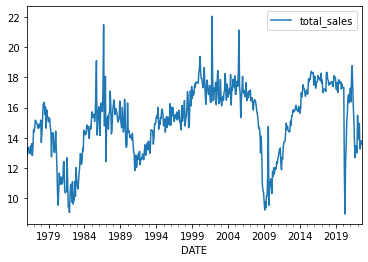

In [102]:
df.plot()

In [154]:
copper.head(50)

,mine_production,refined_production,refined_usage
year,,,
1960.0,3924,4998,4738
1961.0,4081,5127,5050
1962.0,4216,5296,5048
1963.0,4286,5400,5500
1964.0,4443,5739,5995
1965.0,4769,6059,6193
1966.0,4987,6324,6445
1967.0,4743,6004,6195
1968.0,5010,6653,6523


In [153]:
copper = copper.replace(',','', regex=True)

In [142]:
copper.set_index('year', inplace=True)

In [128]:
copper.shape

(63, 4)

In [155]:
copper = copper.astype('int')

In [156]:
copper.dtypes

mine_production       int64
refined_production    int64
refined_usage         int64
dtype: object

<AxesSubplot:xlabel='year'>

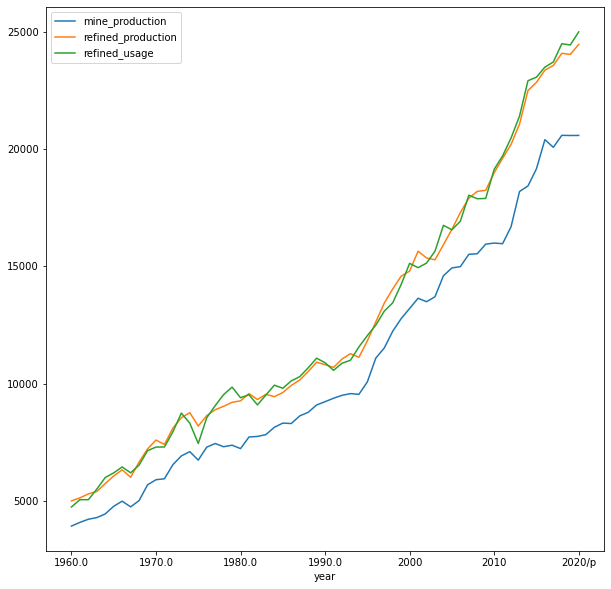

In [166]:
#plt.figure(figsize=(20, 9))
copper.plot(figsize=(10, 10))

In [135]:
copper = copper.dropna()

In [136]:
copper.shape

(61, 4)

In [121]:
copper[copper['year'].isnull() == True]

,year,mine_production,refined_production,refined_usage
21,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN


In [124]:
copper[copper['mine_production'].isnull() == True]

,year,mine_production,refined_production,refined_usage
21,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN


In [125]:
copper[copper['refined_production'].isnull() == True]

,year,mine_production,refined_production,refined_usage
21,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN


In [126]:
copper[copper['refined_usage'].isnull() == True]

,year,mine_production,refined_production,refined_usage
21,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN


In [114]:
copper.dtypes

year                  object
mine_production       object
refined_production    object
refined_usage         object
dtype: object

In [117]:
convert_dict = {'year': int,
                'mine_production': int,
                'refined_production': int,
                'refined_usage': int
                }
 
copper = copper.astype(convert_dict)

ValueError: cannot convert float NaN to integer

# Pre-Model
## Split

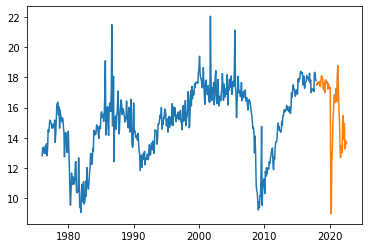

In [108]:
train_size = .90
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

plt.plot(train)
plt.plot(test)

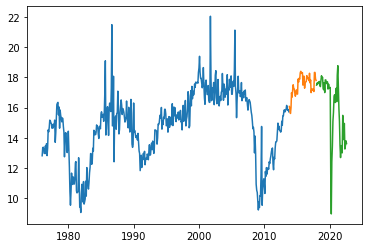

In [110]:
train_size = .90
n = train.shape[0]
validate_start_index = round(train_size * n)

train = df[:validate_start_index]
validate = df[validate_start_index:test_start_index]

plt.plot(train)
plt.plot(validate)
plt.plot(test)